In [17]:
%matplotlib inline
import numpy as np
from tqdm import trange
np.set_printoptions(suppress=True)

In [32]:
# load the mnist dataset

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [34]:
X_train[0].shape

(28, 28)

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(sci_mode=False)

class BobNet(torch.nn.Module):
    def __init__(self):
        super(BobNet, self).__init__()
        self.l1 = nn.Linear(784, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = self.act(x)
        return x
    
# instantiate the model
model = BobNet()

In [94]:
# how to easyly sample?
# given the training set, randomly sample elements accordingly to the batch size
print(X_train.shape[0])
np.random.randint(0, X_train.shape[0], size=3)

60000


array([19859, 14386, 18771])

In [95]:
# simple training loop
BS = 32 # batch size as a constant
loss_function = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.0001)
losses, accuracies = [], []


for i in (t := trange(1000)):
    samp = np.random.randint(0, X_train.shape[0], size=(BS))
    X = torch.tensor(X_train[samp].reshape((-1, 28*28))).float()
    Y = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    out = model(X)
    cat = torch.argmax(out, dim=1) # prediction equals the highest probability element
    accuracy = (cat == Y).float().mean() # quantify how many times the prediction matches the ground truth.
    loss = loss_function(out, Y)
    loss.backward() # backpropagation
    optim.step() # computed gradients
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

loss 0.55 accuracy 0.81: 100%|█████████████████████████| 1000/1000 [00:01<00:00, 699.36it/s]


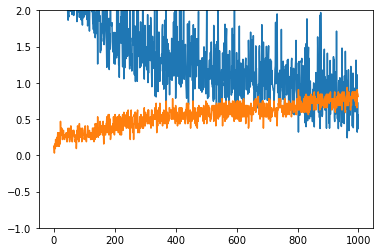

In [96]:
plt.ylim(-1, 2)
plot(losses)
plot(accuracies)

In [77]:
# run the model
model(torch.tensor(X_train[0:10].reshape((-1, 28*28))).float())

tensor([[-3.0213e-01, -3.3789e-01,  3.6760e-01,  2.1675e-01, -1.1322e-01,
          1.4784e-01, -1.6583e-01, -3.1081e-01,  3.5904e-01,  2.1607e-01],
        [ 2.2547e+02, -1.7325e+02, -4.7388e+01, -2.1370e+02,  3.1691e+01,
         -2.2288e+01,  4.6448e+01, -1.1868e+02, -1.3362e+02, -2.0692e+02],
        [-3.9820e+01, -2.0903e+02, -6.8650e+01, -1.9833e+02,  1.9225e+02,
          7.8484e+01, -1.1578e+02,  1.3703e+01, -1.7097e+02,  8.3251e+01],
        [-3.0213e-01, -3.3789e-01,  3.6760e-01,  2.1675e-01, -1.1322e-01,
          1.4784e-01, -1.6583e-01, -3.1081e-01,  3.5904e-01,  2.1607e-01],
        [-3.0213e-01, -3.3789e-01,  3.6760e-01,  2.1675e-01, -1.1322e-01,
          1.4784e-01, -1.6583e-01, -3.1081e-01,  3.5904e-01,  2.1607e-01],
        [-3.0213e-01, -3.3789e-01,  3.6760e-01,  2.1675e-01, -1.1322e-01,
          1.4784e-01, -1.6583e-01, -3.1081e-01,  3.5904e-01,  2.1607e-01],
        [-7.2788e+01,  9.4434e+01,  1.3883e+01, -1.4804e+01, -1.1532e+02,
         -7.2544e+01, -1.0765e+0

In [10]:
X_train.reshape(-1, 28*28).shape

(60000, 784)

(<matplotlib.image.AxesImage at 0x1378e5940>, 5)

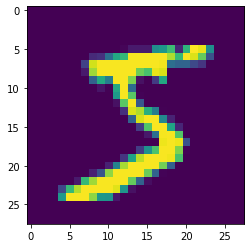

In [20]:
imshow(X_train[0]), Y_train[0]